# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from selenium import webdriver

# Set the path to the Chrome driver executable file
driver_path = r"C:\Users\emart\OneDrive\Desktop\OSUFOLDER\SQL\MarsScrape\Starter_Code\chromedriver.exe"

# Create a new instance of the Chrome driver
driver = webdriver.Chrome(driver_path)

# Use the driver to open a web page
driver.get("https://www.google.com")

# Close the driver
driver.quit()


C:\Users\emart\AppData\Local\Temp\ipykernel_20476\2689117671.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(driver_path)


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [15]:
# Set the path to the Chrome driver executable file
driver_path = r"C:\Users\emart\OneDrive\Desktop\OSUFOLDER\SQL\MarsScrape\Starter_Code\chromedriver.exe"

# Create a new instance of the Chrome driver
browser = Browser('chrome', executable_path=driver_path)

# Visit the Mars news site
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [24]:
# Create a Beautiful Soup Object    
html = browser.html
mars_data = soup(html, 'html.parser')


In [30]:
# Extract all rows of data

mars_data_df = pd.read_html(url)[0]

#Display the data
mars_data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [31]:
# Create an empty list
mars_data_list = []

# Loop through the rows of data and append to the list
for i in range(len(mars_data_df)): 
    mars_data_list.append(mars_data_df.iloc[i,:])

# Display the list of rows
mars_data_list



[id                           2
 terrestrial_date    2012-08-16
 sol                         10
 ls                         155
 month                        6
 min_temp                 -75.0
 pressure                 739.0
 Name: 0, dtype: object,
 id                          13
 terrestrial_date    2012-08-17
 sol                         11
 ls                         156
 month                        6
 min_temp                 -76.0
 pressure                 740.0
 Name: 1, dtype: object,
 id                          24
 terrestrial_date    2012-08-18
 sol                         12
 ls                         156
 month                        6
 min_temp                 -76.0
 pressure                 741.0
 Name: 2, dtype: object,
 id                          35
 terrestrial_date    2012-08-19
 sol                         13
 ls                         157
 month                        6
 min_temp                 -74.0
 pressure                 732.0
 Name: 3, dtype: object,
 id 

In [33]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names* `id`: the identification number of a single transmission from the Curiosity rover
mars_data_df = pd.DataFrame(mars_data_list, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

# Display the DataFrame
mars_data_df



,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [34]:
# Confirm DataFrame was created successfully
mars_data_df.head()



,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [35]:
# Examine data type of each column
mars_data_df.dtypes


id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [36]:
# Change data types for data analysis
mars_data_df['id'] = mars_data_df['id'].astype('int64')
mars_data_df['terrestrial_date'] = pd.to_datetime(mars_data_df['terrestrial_date'])
mars_data_df['sol'] = mars_data_df['sol'].astype('int64')
mars_data_df['ls'] = mars_data_df['ls'].astype('int64')
mars_data_df['month'] = mars_data_df['month'].astype('int64')
mars_data_df['min_temp'] = mars_data_df['min_temp'].astype('int64')
mars_data_df['pressure'] = mars_data_df['pressure'].astype('int64')


In [37]:
# Confirm type changes were successful by examining data types again
mars_data_df.dtypes


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                     int64
pressure                     int64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [39]:
# 1. How many months are there on Mars?
num_months = mars_data_df['month'].nunique()
print(f"There are {num_months} months on Mars.")

There are 12 months on Mars.


In [40]:
# 2. How many Martian days' worth of data are there?   
num_sols = mars_data_df['sol'].nunique()
print(f"There are {num_sols} Martian days' worth of data.")


There are 1867 Martian days' worth of data.


In [41]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_data_df.groupby('month')['min_temp'].mean()
print(f"The average low temperature by month is: {avg_low_temp}")


The average low temperature by month is: month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


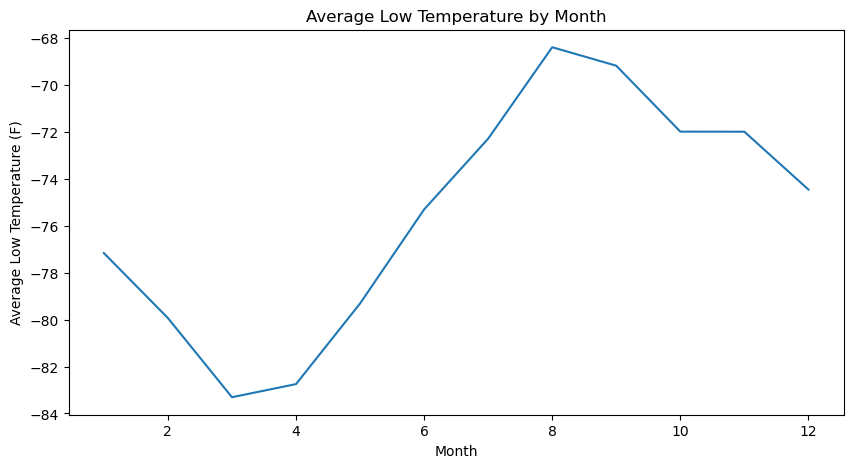

In [42]:
# Plot the average temperature by month
avg_low_temp.plot(kind='line', figsize=(10,5))
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (F)')
plt.show()


In [43]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = mars_data_df['month'].min()
hottest_month = mars_data_df['month'].max()
print(f"The coldest month is {coldest_month} and the hottest month is {hottest_month}.")
print(f"The average low temperature in the coldest month is {avg_low_temp[coldest_month]} degrees F.")
print(f"The average low temperature in the hottest month is {avg_low_temp[hottest_month]} degrees F.")


The coldest month is 1 and the hottest month is 12.
The average low temperature in the coldest month is -77.16091954022988 degrees F.
The average low temperature in the hottest month is -74.45180722891567 degrees F.


In [44]:
# 4. Average pressure by Martian month
avg_pressure = mars_data_df.groupby('month')['pressure'].mean()
print(f"The average pressure by Martian month is: {avg_pressure}")


The average pressure by Martian month is: month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


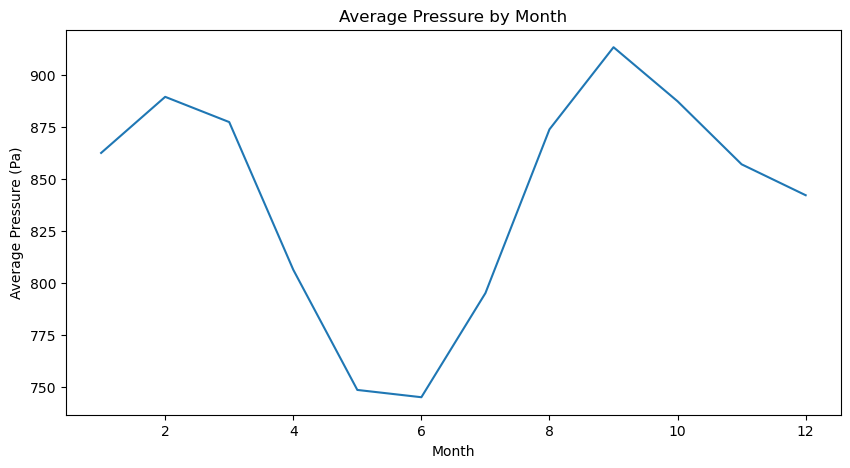

In [45]:
# Plot the average pressure by month
avg_pressure.plot(kind='line', figsize=(10,5))
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.show()


In [46]:
# 5. How many terrestrial (earth) days are there in a Martian year?
num_earth_days = mars_data_df['terrestrial_date'].nunique()
print(f"There are {num_earth_days} terrestrial days in a Martian year.")


There are 1867 terrestrial days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [47]:
# Write the data to a CSV
mars_data_df.to_csv('mars_data.csv', index=False)



In [48]:
browser.quit()